# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

## importing necessary libraries.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading train dataset

In [81]:
df1 = pd.read_csv('blackFriday_train.csv')

print(df1.shape)
df1.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Loading test dataset

In [82]:
df2 = pd.read_csv('blackFriday_test.csv')
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [83]:
print(df2.shape) # checking the number of rows and columns in the test dataset

(233599, 11)


### Merging both train and test dataset.

In [84]:
df = df1.append(df2, sort=False)
df.shape

(783667, 12)

### visualizing fist 5 rows of the dataset.


In [85]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Describing the basic statistics of the data.

In [86]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Dropping unnecessary fields from the dataset.


In [87]:
df.drop(['User_ID'],axis=1,inplace=True)

In [88]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Converting categorical data into integer ones by using mapping function.

In [89]:
df['Gender']=df['Gender'].map({'F':0, 'M':1})
df['Gender'].head(10) # checking the column after tranasformation

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

### visualizing the unique values of the particular field.

In [90]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

### Mapping the range variable into integer ones.

In [91]:
df['Age']=df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

In [92]:
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [93]:
df.City_Category.unique() # checking the uniquce values in the City_Category column

array(['A', 'C', 'B'], dtype=object)

### creating dummies for the categorical data.

In [94]:
city = pd.get_dummies(df['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


### Concatinaing dummy variables with original dataset.

In [95]:
df = pd.concat([df,city],axis=1)
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


### visualizing last 5 rows of the dataset.

In [96]:
df.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1
233598,P00316642,0,5,0,B,4+,1,4,5.0,NaN,NaN,1,0


### Checking for columnwise null values 

In [97]:
x = df.isnull().sum()
x

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### visualizing unique values of fields which contains NAN values for different columns.

In [98]:
x/len(df.Product_ID)*100

Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
B                              0.000000
C                              0.000000
dtype: float64

In [99]:
df.Product_Category_1.unique()  

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [100]:
df.Product_Category_2.unique()  

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [101]:
df.Product_Category_3.unique()  

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Value count of each variable.

In [102]:
df.Product_Category_2.value_counts()  

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

### Finding mode of the field.

In [103]:
df.Product_Category_1.mode()  

0    5
dtype: int64

### Renaming the columns.

In [104]:
df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2', 'Product_Category_3':'cat3'},inplace=True)

### Looking at the column names after the rename operation.

In [105]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

### filling the nan values with the mode.

### Looking at the amount of NAN values here i.e Product_category_2 - 31%, Product_category_3 - 69% and purchase - 29% we cant simply delete the NAN consisiting rows
### Hence in this conditions we will replace the continuous  variables NAN values with median and descrete variable NAN values with mode.

### Filling NAN values with mode

In [106]:
df['cat2'] = df['cat2'].fillna(df['cat2'].mode()[0])

In [107]:
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,NaN,7969.0,0,1


In [108]:
df.cat2.mode() # checking the mode after transformation

0    8.0
dtype: float64

In [109]:
df['cat3'] = df['cat3'].fillna(df['cat3'].mode()[0])

In [110]:
df.isnull().sum() # checking the dataframe again for null values. cat1, cat2 and cat3 no more have null values

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                               0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Filling the nan values with the mean of the column.

In [111]:
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [112]:
df.head() # looking at the datset after filling the null value

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969.0,0,1


### Rechecking the null values.

In [113]:
df.isnull().sum() # all the null values have been removed

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

### Dropping the Column.

In [114]:
df.drop('City_Category',axis=1, inplace=True) 

In [115]:
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [116]:
df.Stay_In_Current_City_Years.unique() # checking the unique values in the column Stay_In_Current_City_Years

array(['2', '4+', '3', '1', '0'], dtype=object)

### Replacing the value by using str method.

In [117]:
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','') # replacing + with blank

In [118]:
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


### Checking the allover info of the dataset.

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


### converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [120]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

### Rechecking the datatypes of the dataset.

In [121]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                      float64
B                               int32
C                               int32
dtype: object

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


### Creating a checkpoint.

In [123]:
df_i = df.copy()

# Dropping the unnecessary field.
df_i.drop('Product_ID',axis=1,inplace=True)

In [124]:
df_i.head(10)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
5,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


### Visualizing Age Vs Purchased.

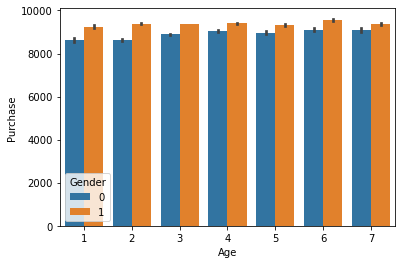

In [125]:
sns.barplot('Age','Purchase',hue='Gender',data=df_i)

Purchasing of goods of each range of age are almost equal.
We can conclude that the percentage of purchasing goods of men over women is higher.

### Visualizing Occupation Vs Purchased.

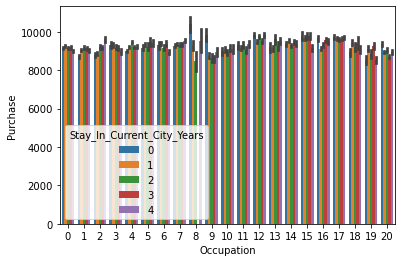

In [126]:
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df_i)

All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city.

### Visualizing Product_category1 Vs Purchased.

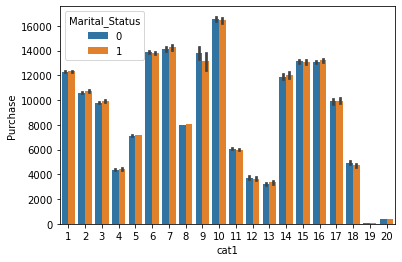

In [127]:
sns.barplot('cat1','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category2 Vs Purchased.

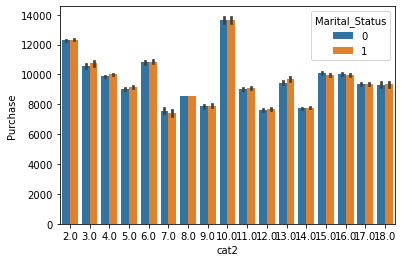

In [128]:
sns.barplot('cat2','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category3 Vs Purchased.

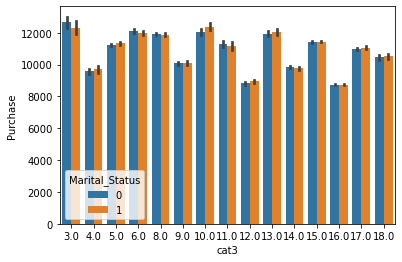

In [129]:
sns.barplot('cat3','Purchase',hue='Marital_Status',data=df_i)

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not.
product category3 is much more purchased by people than product category2 and product category1 

In [130]:
X = df_i.drop('Purchase',axis=1) # dropping the Purchase column to create features
y = df_i.Purchase  # selecting the Purchase column to create labels
print(X.shape)
print(y.shape)

(783667, 10)
(783667,)


In [131]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(587750, 10)
(587750,)
(195917, 10)
(195917,)


In [132]:
# Feature Scaling So that data in all the columns are to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
X_train

array([[ 0.57275431, -0.36745197,  0.6008837 , ...,  0.36937114,
         1.17365495, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431,  1.10995723, -0.16579251, ...,  0.36937114,
         1.17365495, -0.67228678],
       ...,
       [ 0.57275431,  1.84866184,  1.67423038, ...,  0.36937114,
        -0.85203918,  1.48746045],
       [ 0.57275431, -1.10615657, -0.93246871, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  0.36937114,
        -0.85203918,  1.48746045]])

In [134]:
X_test

array([[ 0.57275431, -0.36745197, -0.62579823, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [-1.74594931, -1.10615657, -0.62579823, ...,  0.36937114,
         1.17365495, -0.67228678],
       [ 0.57275431, -1.10615657, -0.62579823, ...,  0.36937114,
        -0.85203918, -0.67228678],
       ...,
       [ 0.57275431, -1.10615657,  0.90755418, ..., -3.64065155,
         1.17365495, -0.67228678],
       [ 0.57275431, -1.10615657,  0.29421322, ...,  0.36937114,
        -0.85203918,  1.48746045],
       [-1.74594931,  1.10995723,  0.6008837 , ...,  0.36937114,
        -0.85203918,  1.48746045]])

Now we have features for both training and testing. The data can now be converted to a dataframe, if necessary, and can be fed to a machine learning model. 

## Linear regression

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.09348988112139389

## Decision Tree Regression

In [137]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.4643212512105209

## Extra Regression

In [138]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train,y_train)
y_predict=ETree.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.36463099260243714

### Here we can clearly see by the scores that we have obtained a high accuracy of 93.4% with the Linear regression model 